In [51]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [52]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

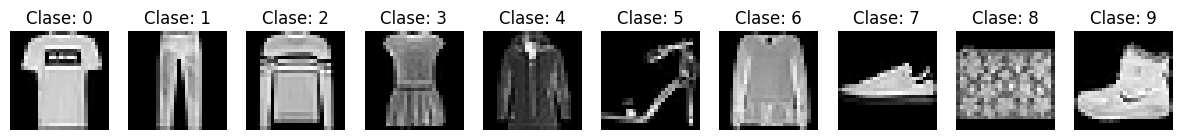

In [4]:
def plot_images_by_class(images, labels, num_classes=10):
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 15))
    for i in range(num_classes):
        # Encontrar la primera imagen para cada clase
        class_idx = (labels == i).argmax()  # Primer índice donde la etiqueta es 'i'
        axes[i].imshow(images[class_idx], cmap='gray')
        axes[i].set_title(f"Clase: {i}")
        axes[i].axis('off')
    plt.show()

plot_images_by_class(x_train, y_train)

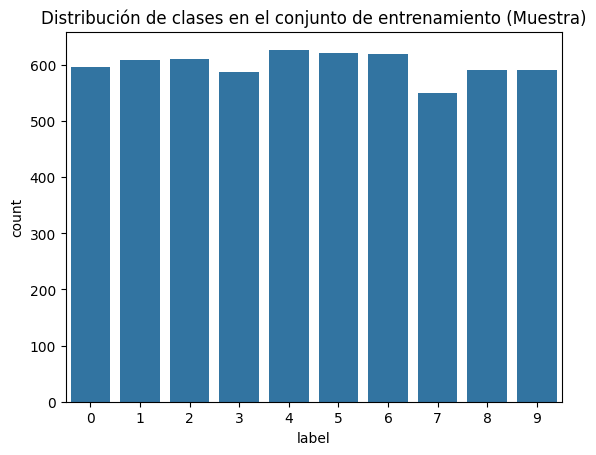

In [53]:
sampled_labels = pd.Series(y_train).sample(frac=0.1, random_state=42)
# Create a DataFrame with the sampled data for seaborn
sampled_df = pd.DataFrame({'label': sampled_labels})
sns.countplot(x='label', data=sampled_df)  # Use the 'label' column from the DataFrame
plt.title("Distribución de clases en el conjunto de entrenamiento (Muestra)")
plt.show()

Los 3 insights que nos llevamos del batch utilizado son:
1. Hay 10 categorías de ropa en la muestra.
2. La quinta categoría (etiqueta=4) es la que más veces se repite. Aparentemente serían abrigos.
3. La octava categoría (etiqueta=7) es la que menos se repite. Aparentemente serían camisas.

In [54]:
x_train = x_train/ 255
x_test = x_test/ 255

In [55]:
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

In [56]:
from tensorflow.keras import Input

i = Input(shape=(28, 28))  # Las imágenes se aplanan (28x28 = 784 características)

d = layers.Flatten()(i)
d = layers.Dense(512, activation='relu')(d)
d = layers.Dense(256, activation='relu')(d)
d = layers.Dense(128, activation='relu')(d)
d = layers.Dense(10, activation='softmax')(d)

# Crear el modelo con la entrada 'i' y la salida 'd'
model = models.Model(i, d)

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=64, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7839 - loss: 0.6156 - val_accuracy: 0.8546 - val_loss: 0.4039
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8644 - loss: 0.3684 - val_accuracy: 0.8643 - val_loss: 0.3672
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8806 - loss: 0.3232 - val_accuracy: 0.8659 - val_loss: 0.3611
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8881 - loss: 0.2979 - val_accuracy: 0.8680 - val_loss: 0.3665
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8932 - loss: 0.2841 - val_accuracy: 0.8754 - val_loss: 0.3422
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9005 - loss: 0.2639 - val_accuracy: 0.8778 - val_loss: 0.3494
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9034 - loss: 0.2555 - val_accuracy: 0.8789 - val_loss: 0.3473
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9085 - loss: 0.2395 - val_accuracy: 0.

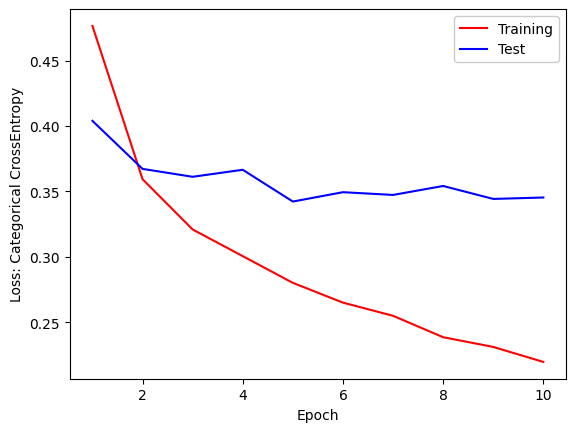

In [58]:
plt.plot(range(1, 11), history.history['loss'], 'r-',label='Training')
plt.plot(range(1, 11), history.history['val_loss'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Loss: Categorical CrossEntropy')
plt.show()

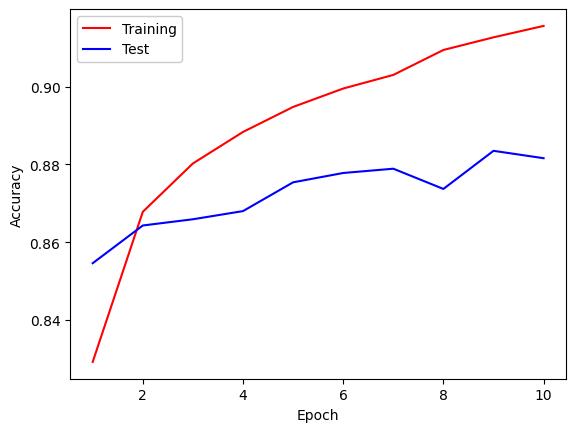

In [59]:
plt.plot(range(1, 11), history.history['accuracy'], 'r-',label='Training')
plt.plot(range(1, 11), history.history['val_accuracy'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [61]:
from tensorflow.keras import Input, regularizers

i = Input(shape=(28, 28))  # Las imágenes se aplanan (28x28 = 784 características)

d = layers.Flatten()(i)
d = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(d)
d = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(d)
d = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(d)
d = layers.Dense(10, activation='softmax')(d)

# Crear el modelo con la entrada 'i' y la salida 'd'
model = models.Model(i, d)

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=64, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7794 - loss: 0.7144 - val_accuracy: 0.8537 - val_loss: 0.4861
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8597 - loss: 0.4602 - val_accuracy: 0.8522 - val_loss: 0.4788
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8775 - loss: 0.4112 - val_accuracy: 0.8685 - val_loss: 0.4315
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8844 - loss: 0.3864 - val_accuracy: 0.8709 - val_loss: 0.4243
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8887 - loss: 0.3728 - val_accuracy: 0.8729 - val_loss: 0.4093
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8927 - loss: 0.3567 - val_accuracy: 0.8767 - val_loss: 0.4037
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8921 - loss: 0.3495 - val_accuracy: 0.8804 - val_loss: 0.3946
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9000 - loss: 0.3315 - val_accuracy: 0.

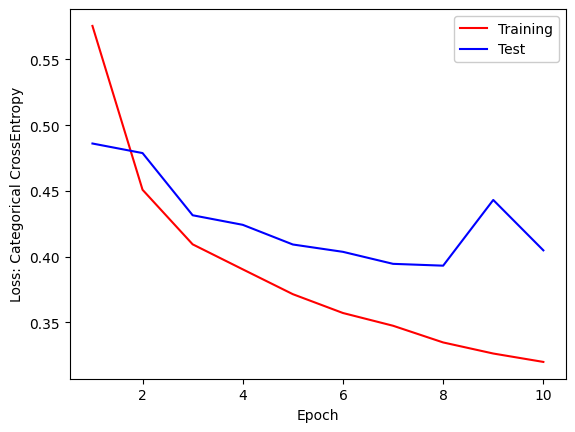

In [63]:
plt.plot(range(1, 11), history.history['loss'], 'r-',label='Training')
plt.plot(range(1, 11), history.history['val_loss'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Loss: Categorical CrossEntropy')
plt.show()

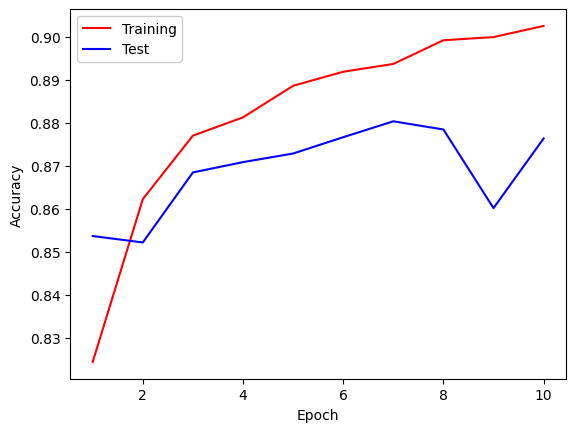

In [64]:
plt.plot(range(1, 11), history.history['accuracy'], 'r-',label='Training')
plt.plot(range(1, 11), history.history['val_accuracy'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [65]:
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout

i = Input(shape=(28, 28))  # Las imágenes se aplanan (28x28 = 784 características)

d = layers.Flatten()(i)
d = layers.Dense(512, activation='relu')(d)
d = BatchNormalization()(d)
d = Dropout(0.5)(d)
d = layers.Dense(256, activation='relu')(d)
d = BatchNormalization()(d)
d = Dropout(0.5)(d)
d = layers.Dense(128, activation='relu')(d)
d = BatchNormalization()(d)
d = Dropout(0.5)(d)
d = layers.Dense(10, activation='softmax')(d)

# Crear el modelo con la entrada 'i' y la salida 'd'
model = models.Model(i, d)

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [66]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=64, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6691 - loss: 0.9834 - val_accuracy: 0.8286 - val_loss: 0.4723
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8114 - loss: 0.5341 - val_accuracy: 0.8338 - val_loss: 0.4555
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8272 - loss: 0.4966 - val_accuracy: 0.8499 - val_loss: 0.4143
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8322 - loss: 0.4719 - val_accuracy: 0.8462 - val_loss: 0.4272
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8343 - loss: 0.4636 - val_accuracy: 0.8516 - val_loss: 0.4201
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8385 - loss: 0.4584 - val_accuracy: 0.8574 - val_loss: 0.3885
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8445 - loss: 0.4391 - val_accuracy: 0.8624 - val_loss: 0.3819
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8448 - loss: 0.4311 - val_accuracy: 0

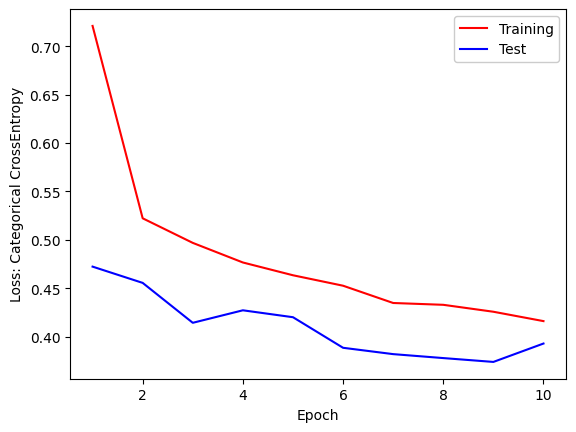

In [67]:
plt.plot(range(1, 11), history.history['loss'], 'r-',label='Training')
plt.plot(range(1, 11), history.history['val_loss'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Loss: Categorical CrossEntropy')
plt.show()

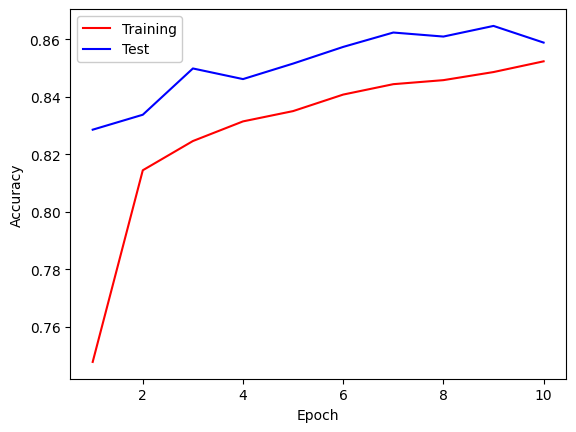

In [68]:
plt.plot(range(1, 11), history.history['accuracy'], 'r-',label='Training')
plt.plot(range(1, 11), history.history['val_accuracy'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

La conclusión que nos llevamos al cabo de 3 variantes del modelo es que al utilizar ciertos regularizadores, el modelo puede evitar el sobreajuste y efectivamente predecir mejor para el set de validación/test que para el set de entrenamiento.